In [1]:
import pandas as pd
import numpy as np # for math computation, EFFICIENT data prep
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # slightly better visuals than matplot

In [2]:
df = pd.read_csv("final_data_AXA.csv")

In [3]:
df.head()

,Date,Open,High,Low,FTSE100_Close,Adj Close,Volume,FTSE100_7Day_EMA,FTSE100_30Day_EMA,FTSE100_7Day_SMA,FTSE100_30Day_SMA,Bitcoin_Price_GBP,FTSE100_Return,Bitcoin_Return
0,2019-08-27,7095.000000,7110.799805,7044.700195,7089.600098,7089.600098,851399100,7133.016819,7297.776151,7135.528669,7347.116699,8292.351562,-0.000761,-0.021773
1,2019-08-28,7089.600098,7131.200195,7050.000000,7114.700195,7114.700195,675638900,7128.437663,7285.964799,7135.171526,7331.700033,7983.849121,0.003540,-0.037203
2,2019-08-29,7114.700195,7199.200195,7103.100098,7184.299805,7184.299805,635681800,7142.403199,7279.405767,7134.400042,7319.993359,7804.203613,0.009783,-0.022501
3,2019-08-30,7184.299805,7240.399902,7179.700195,7207.200195,7207.200195,727868800,7158.602448,7274.747343,7146.142927,7310.463363,7893.874023,0.003188,0.011490
4,2019-09-02,7207.200195,7315.299805,7206.899902,7281.899902,7281.899902,497764900,7189.426811,7275.208798,7157.271484,7302.903353,8575.850586,0.010365,0.086393


In [4]:
# Summary Statistics
print("\nSummary Statistics:\n")
print(df.describe())


Summary Statistics:

              Open         High          Low  FTSE100_Close    Adj Close  \
count  1231.000000  1231.000000  1231.000000    1231.000000  1231.000000   
mean   7174.327053  7219.121778  7129.565238    7175.219254  7175.219254   
std     628.434904   617.739488   641.207523     629.209957   629.209957   
min    4993.899902  5181.000000  4898.799805    4993.899902  4993.899902   
25%    6960.500000  7007.949951  6900.500000    6960.500000  6960.500000   
50%    7324.500000  7368.299805  7282.500000    7326.100098  7326.100098   
75%    7573.300049  7613.400146  7532.300049    7573.600098  7573.600098   
max    8445.799805  8474.400391  8427.900391    8445.799805  8445.799805   

             Volume  FTSE100_7Day_EMA  FTSE100_30Day_EMA  FTSE100_7Day_SMA  \
count  1.231000e+03       1231.000000        1231.000000       1231.000000   
mean   8.435573e+08       7172.633095        7164.678294       7172.605862   
std    3.220907e+08        619.883198         588.319457   

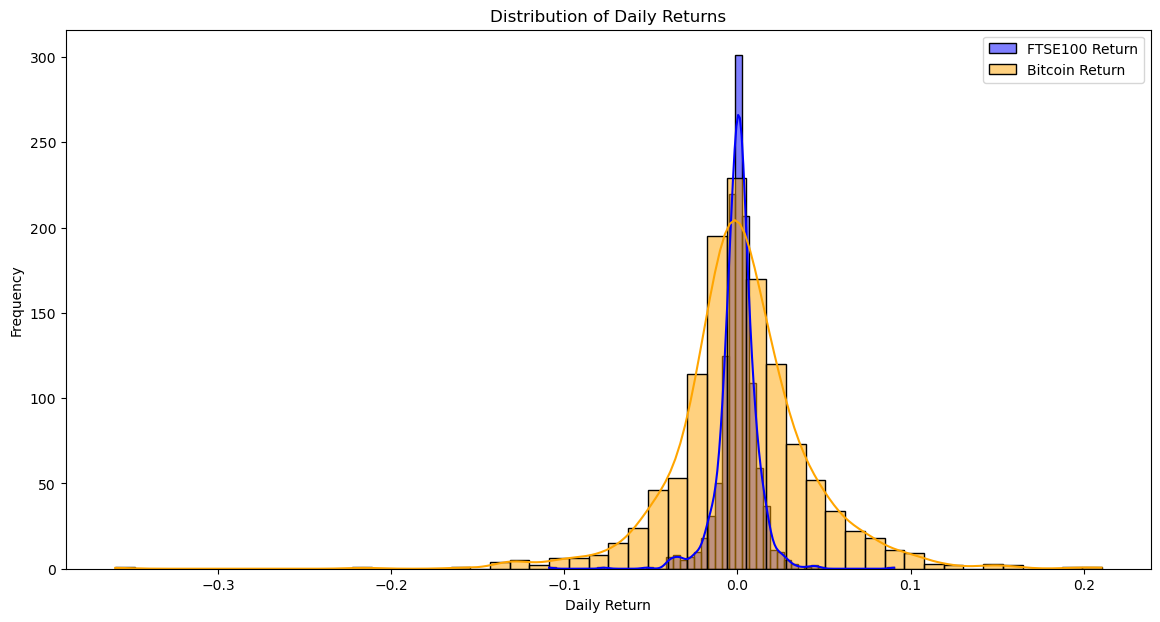

In [5]:
# Distribution Analysis
plt.figure(figsize=(14, 7))
sns.histplot(df['FTSE100_Return'], bins=50, color='blue', label='FTSE100 Return', kde=True)
sns.histplot(df['Bitcoin_Return'], bins=50, color='orange', label='Bitcoin Return', kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [6]:
# Correlation Analysis
correlation = df[['FTSE100_Return', 'Bitcoin_Return']].corr()
print("\nCorrelation between FTSE100 and Bitcoin Returns:\n")
print(correlation)


Correlation between FTSE100 and Bitcoin Returns:

                FTSE100_Return  Bitcoin_Return
FTSE100_Return        1.000000        0.219092
Bitcoin_Return        0.219092        1.000000


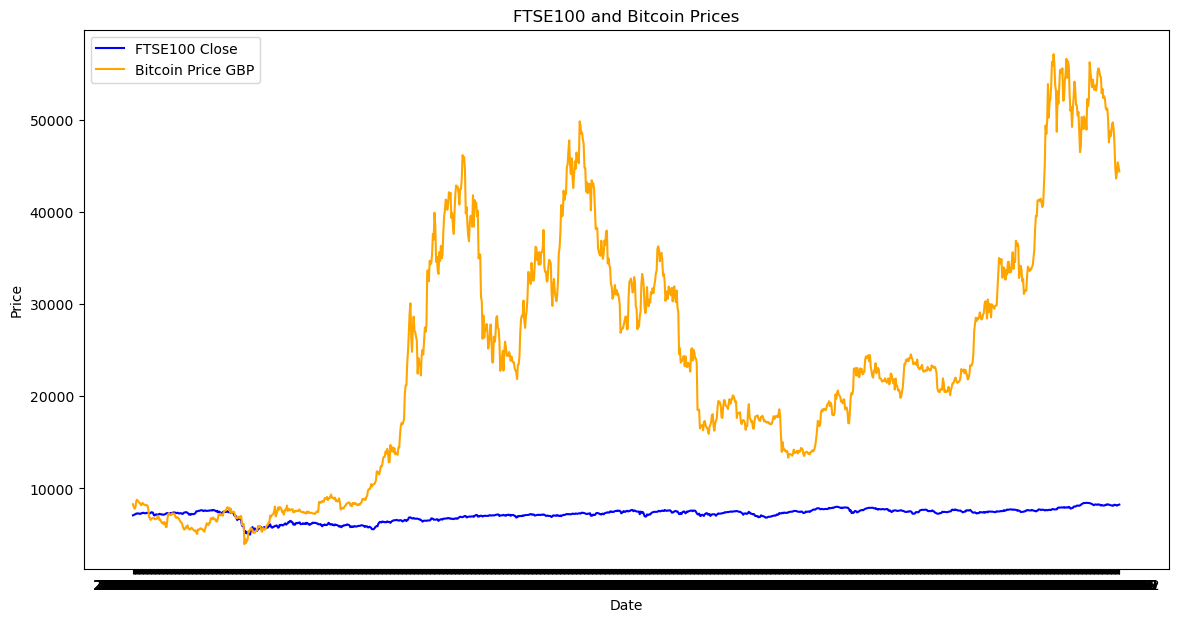

In [7]:
# Trend Analysis
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['FTSE100_Close'], label='FTSE100 Close', color='blue')
plt.plot(df['Date'], df['Bitcoin_Price_GBP'], label='Bitcoin Price GBP', color='orange')
plt.title('FTSE100 and Bitcoin Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [8]:
# Volatility Analysis
df['FTSE100_Volatility'] = df['FTSE100_Return'].rolling(window=30).std() * (30 ** 0.5)
df['Bitcoin_Volatility'] = df['Bitcoin_Return'].rolling(window=30).std() * (30 ** 0.5)

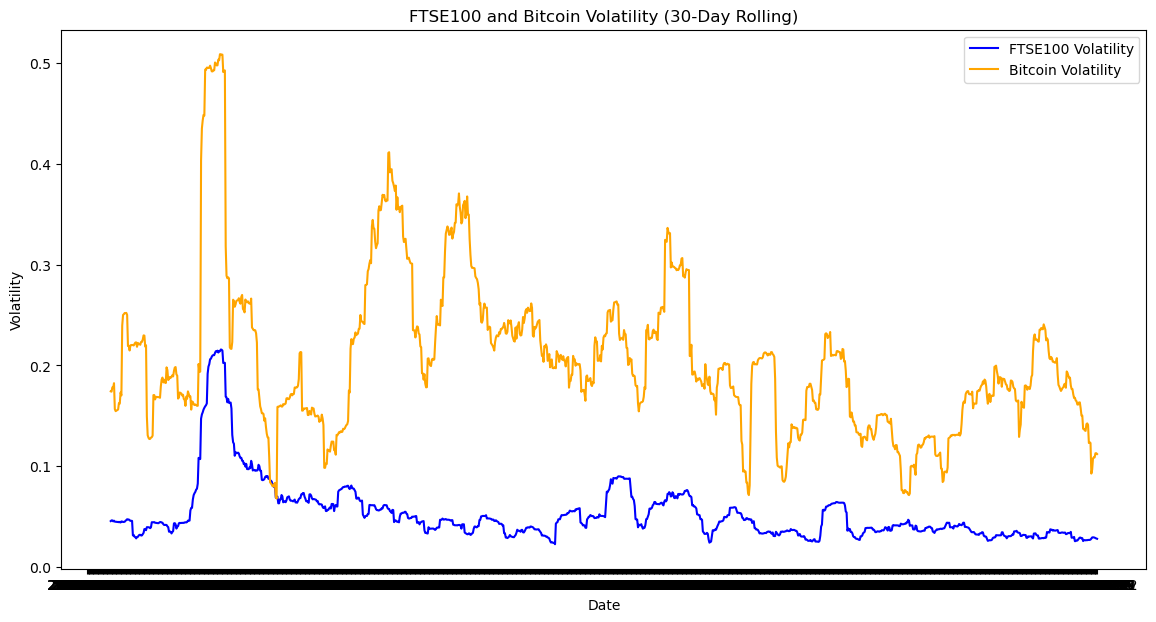

In [9]:

plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['FTSE100_Volatility'], label='FTSE100 Volatility', color='blue')
plt.plot(df['Date'], df['Bitcoin_Volatility'], label='Bitcoin Volatility', color='orange')
plt.title('FTSE100 and Bitcoin Volatility (30-Day Rolling)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()